In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import os

def readFiles(fileName) : 
    files = []
    print("reading " + fileName + " files...")
    for i in range(10) : 
        if (os.path.isfile('reno.tr')) : 
            os.system("rm " + fileName + ".tr")
        os.system("ns " + fileName + ".tcl")
        
        f = open(fileName +  ".tr", "r")
        currFile = f.readlines()
        for j in range(len(currFile)) : 
            currFile[j] = currFile[j].split()
        files.append(currFile)
        print((i + 1)*10, "%")
    return files

def readTrs() : 
    renoFiles = readFiles("reno")
    tahoeFiles = readFiles('tahoe')
    vegasFiles = readFiles("vegas")
    
    return [renoFiles, tahoeFiles, vegasFiles]
    
[renoFiles, tahoeFiles, vegasFiles] = readTrs()

reading reno files...
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %
reading tahoe files...
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %
reading vegas files...
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %


In [2]:
def average(lst, prevVal = 0) :
    if (len(lst) == 0) : 
        return prevVal
    return sum(lst) / len(lst) 

In [3]:
def getAverages(currentList) : 
    listSize = len(currentList)
    fileSize = len(currentList[0])
    outList = []
    for i in range(fileSize) : 
        curVals = []
        for j in range(listSize) : 
            curVals.append(currentList[j][i])
        avgVal = average(curVals)
        outList.append(avgVal)
    return outList

In [4]:
def getTrimmedList(fileLists, outNode1, outNode2) : 
    files = len(fileLists)
    cwnds1 = [[] for i in range(files)]
    cwnds2 = [[] for i in range(files)]
    rtts1 = [[] for i in range(files)]
    rtts2 = [[] for i in range(files)]
    goodPuts1 = [[] for i in range(files)]
    goodPuts2 = [[] for i in range(files)]
    drops1 = [[] for i in range(files)]
    drops2 = [[] for i in range(files)]
    for i in range(files) : 
        time = 0
        cwnd1Time = []
        cwnd2Time = []
        rtt1Time = []
        rtt2Time = []
        enQ1Time = 0
        enQ2Time = 0
        r1Time = 0
        r2Time = 0
        d1Time = 0
        d2Time = 0
        packetLossed1 = False
        packetLossed2 = False 
        lines = len(fileLists[i])
        for j in range(lines) :
#             enQNode = 2 #node that we enqueue for calculating total packets sent.
            curTime = 0
            if (fileLists[i][j][0] == "+" or fileLists[i][j][0] == "-" or fileLists[i][j][0] == "d" or fileLists[i][j][0] == "r") : 
                curTime = int(float(fileLists[i][j][1]))
                outNode = int(fileLists[i][j][3])
            else :
                curTime = int(float(fileLists[i][j][0]))
                outNode = int(fileLists[i][j][3])
            
            if (curTime > time) : 
                # time increament
                time += 1
                
                # cwnd handling
                cwnd1PrevVal = 0 if (len(cwnds1[i]) == 0) else cwnds1[i][-1]
                cwnd2PrevVal = 0 if (len(cwnds2[i]) == 0) else cwnds2[i][-1]
                cwnd1Avg = average(cwnd1Time, cwnd1PrevVal)
                cwnd2Avg = average(cwnd2Time, cwnd2PrevVal)
                cwnds1[i].append(cwnd1Avg)
                cwnds2[i].append(cwnd2Avg)
                cwnd1Time.clear()
                cwnd2Time.clear()
                
                # rtt handling
                rtt1PrevVal = 0 if (len(rtts1[i]) == 0) else rtts1[i][-1]
                rtt2PrevVal = 0 if (len(rtts2[i]) == 0) else rtts2[i][-1]
                rtt1Avg = average(rtt1Time, rtt1PrevVal)
                rtt2Avg = average(rtt2Time, rtt2PrevVal)
                rtts1[i].append(rtt1Avg)
                rtts2[i].append(rtt2Avg)
                rtt1Time.clear()
                rtt2Time.clear()
                
                # goodput handling
                goodput1 = (r1Time * 1000 * 8) / 1000000 #packet size = 1000, byte = 8 bit, 1 Mbps = 10^6 bit/sec
                goodput2 = (r2Time * 1000 * 8) / 1000000 #packet size = 1000, byte = 8 bit, 1 Mbps = 10^6 bit/sec
                goodPuts1[i].append(goodput1)
                goodPuts2[i].append(goodput2)
                r1Time = 0
                r2Time = 0
                packetLossed1 = False
                packetLossed2 = False
                
                # packet loss rate
                plr1 = 0 if (d1Time == 0) else (d1Time)
                plr2 = 0 if (d2Time == 0) else (d2Time)
                drops1[i].append(plr1)
                drops2[i].append(plr2)
                d1Time = 0
                d2Time = 0
                enQ1Time = 0
                enQ2Time = 0
   
            if (fileLists[i][j][5] == "cwnd_") : 
                cwndVal = float(fileLists[i][j][6])
                if (outNode == outNode1) : 
                    cwnd1Time.append(cwndVal)
                elif (outNode == outNode2) : 
                    cwnd2Time.append(cwndVal)
                    
            elif (fileLists[i][j][5] == "rtt_") : 
                rttVal = float(fileLists[i][j][6])
                if (outNode == outNode1) : 
                    rtt1Time.append(rttVal)
                elif (outNode == outNode2) : 
                    rtt2Time.append(rttVal)
            
            elif (fileLists[i][j][0] == "r") :
                if (outNode == outNode1) : 
                    if (packetLossed1 == False) :
                        r1Time += 1
                elif (outNode == outNode2) : 
                    if (packetLossed2 == False) :
                        r2Time += 1
                        
            elif (fileLists[i][j][0] == "d") :
                destNode = int(float(fileLists[i][j][9]))
                if (destNode == outNode1) : 
                    d1Time += 1
                    packetLossed1 = True
                elif (destNode == outNode2) : 
                    d2Time += 1
                    packetLossed2 = True
            
#             elif (fileLists[i][j][0] == "+") :
#                 destNode = int(float(fileLists[i][j][9]))
#                 if (outNode == enQNode and fileLists[i][j][4] == 'tcp') : 
#                     if (destNode == outNode1) : 
#                         enQ1Time += 1
#                     elif (outNode == outNode2) : 
#                         enQ2Time += 1
                    
                
    avgCwnds1 = getAverages(cwnds1)
    avgCwnds2 = getAverages(cwnds2)
    avgRtts1 = getAverages(rtts1)
    avgRtts2 = getAverages(rtts2)
    avgGoodPuts1 = getAverages(goodPuts1)
    avgGoodPuts2 = getAverages(goodPuts2)
    avgDrops1 = getAverages(drops1)
    avgDrops2 = getAverages(drops2)
    
                
    return [avgCwnds1, avgCwnds2, avgRtts1, avgRtts2, avgGoodPuts1, avgGoodPuts2, avgDrops1, avgDrops2]

In [5]:
[renoCwnds1, renoCwnds2, renoRtts1, renoRtts2, renoGoodPuts1, renoGoodPuts2, renoDrops1, renoDrops2] = getTrimmedList(renoFiles, 4, 5)
[tahoeCwnds1, tahoeCwnds2, tahoeRtts1, tahoeRtts2, tahoeGoodPuts1, tahoeGoodPuts2, tahoeDrops1, tahoeDrops2] = getTrimmedList(tahoeFiles, 4, 5)
[vegasCwnds1, vegasCwnds2, vegasRtts1, vegasRtts2, vegasGoodPuts1, vegasGoodPuts2, vegasDrops1, vegasDrops2] = getTrimmedList(vegasFiles, 4, 5)

In [6]:
def splitIndexes(curList) : 
    listSize = len(curList)
    rowSize = len(curList[0])
    lists = [[] for i in range(rowSize)]
    print(lists)
    for i in range(listSize) : 
        for j in range(rowSize) : 
            lists[j].append(curList[i][j])
    return lists

def showDiagram(d1, d2, label1, label2, yLabel, minY = 0, maxY = 10) : 
    plt.figure(figsize=(15, 10))
    
    plt.plot(d1, linewidth=0.7)
    plt.plot(d2, linewidth=0.7)
    plt.ylim(ymax = maxY, ymin = minY)
    
    plt.legend([label1, label2], loc='upper right')
    
#     print(len(reno1Val))
    plt.xlabel('Time') 
    plt.ylabel(yLabel) 
        
    plt.show()
    
def showAllDiagrams(ds,  labels, yLabel, minY = 0, maxY = 10) : 
    plt.figure(figsize=(15, 10))
    
    for i in range(len(ds)) : 
        plt.plot(ds[i], linewidth=0.7)
    plt.ylim(ymax = maxY, ymin = minY)
    
    plt.legend(labels, loc='upper right')
    
    plt.xlabel('Time') 
    plt.ylabel(yLabel) 
        
    plt.show()

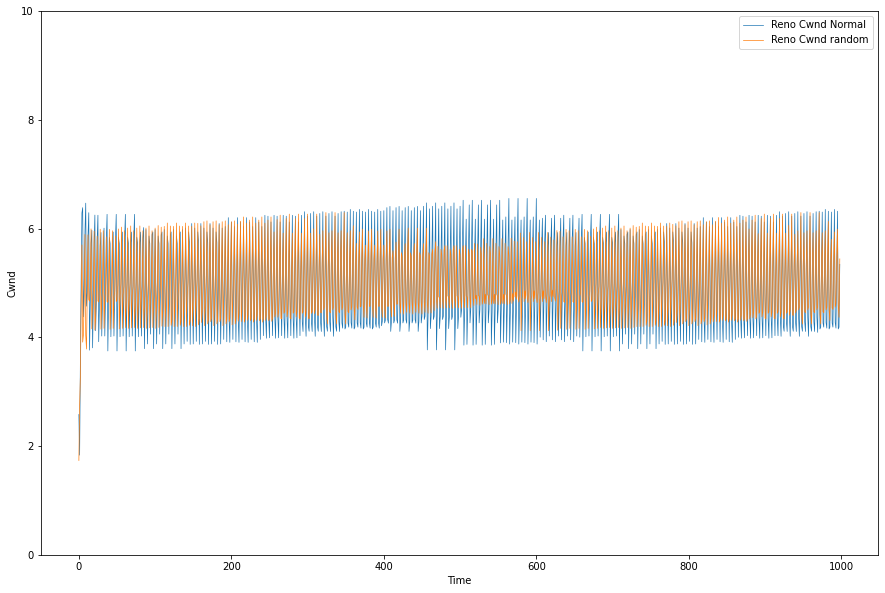

In [7]:
showDiagram(renoCwnds1, renoCwnds2, "Reno Cwnd Normal", "Reno Cwnd random", "Cwnd")

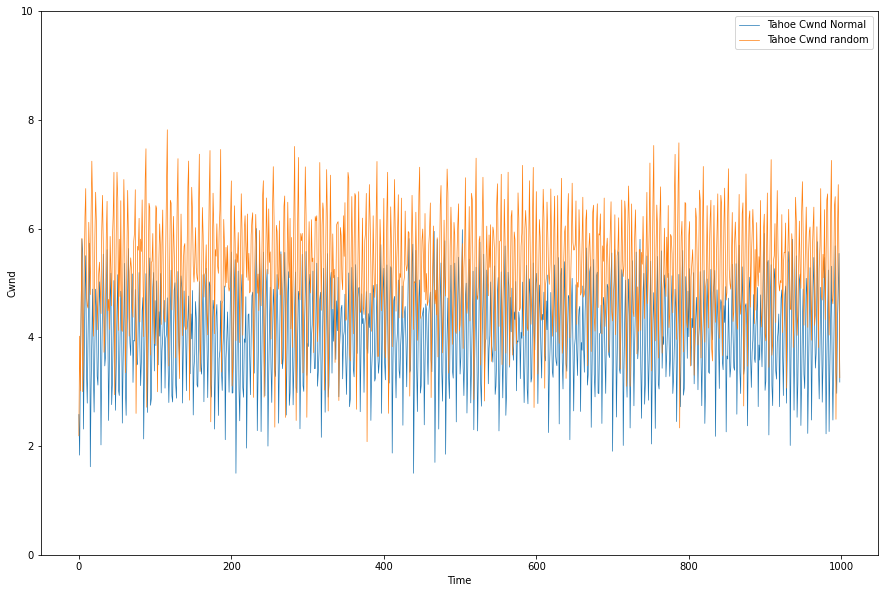

In [8]:
showDiagram(tahoeCwnds1, tahoeCwnds2, "Tahoe Cwnd Normal", "Tahoe Cwnd random", "Cwnd")

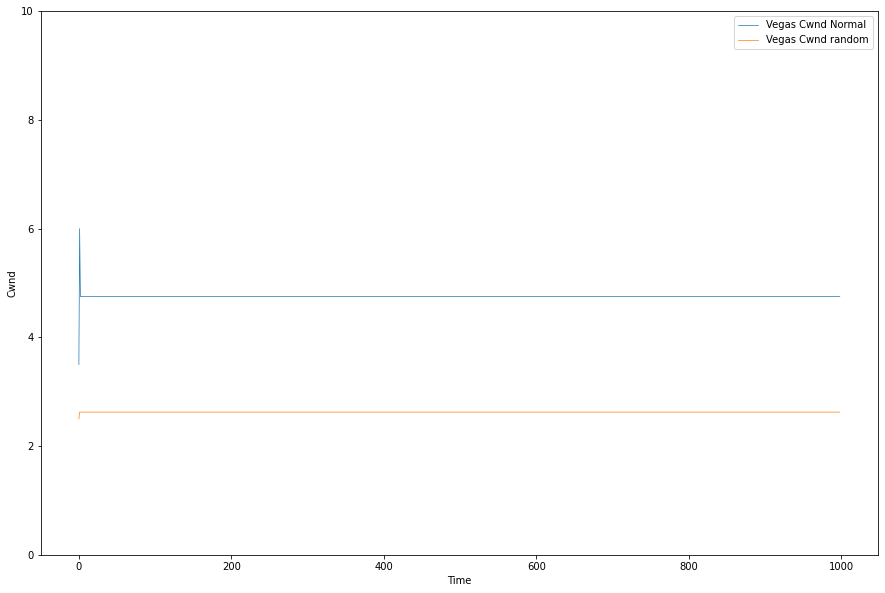

In [9]:
showDiagram(vegasCwnds1, vegasCwnds2, "Vegas Cwnd Normal", "Vegas Cwnd random", "Cwnd")

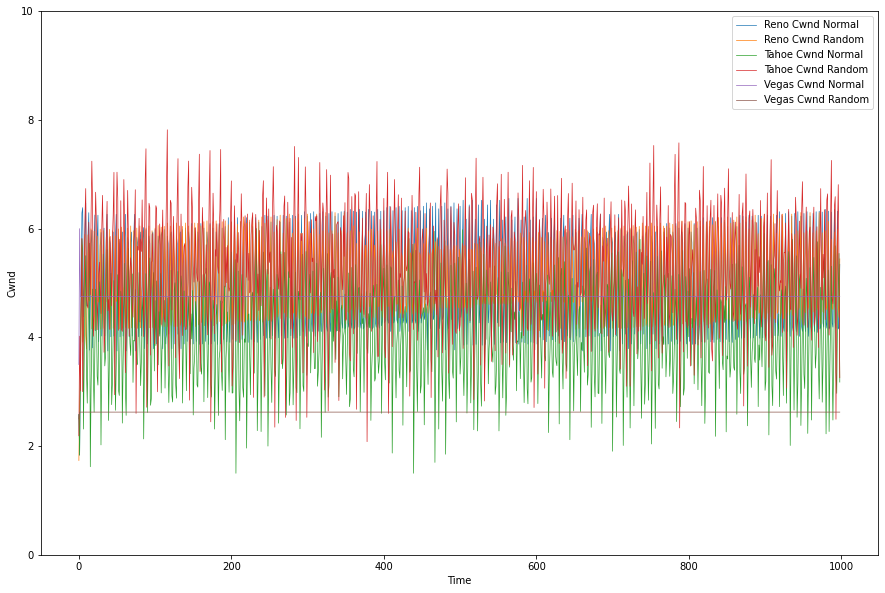

In [10]:
cwnds = [renoCwnds1, renoCwnds2, tahoeCwnds1, tahoeCwnds2, vegasCwnds1, vegasCwnds2]
labels = ["Reno Cwnd Normal", "Reno Cwnd Random", "Tahoe Cwnd Normal", "Tahoe Cwnd Random", "Vegas Cwnd Normal", "Vegas Cwnd Random",]
showAllDiagrams(cwnds, labels, "Cwnd")

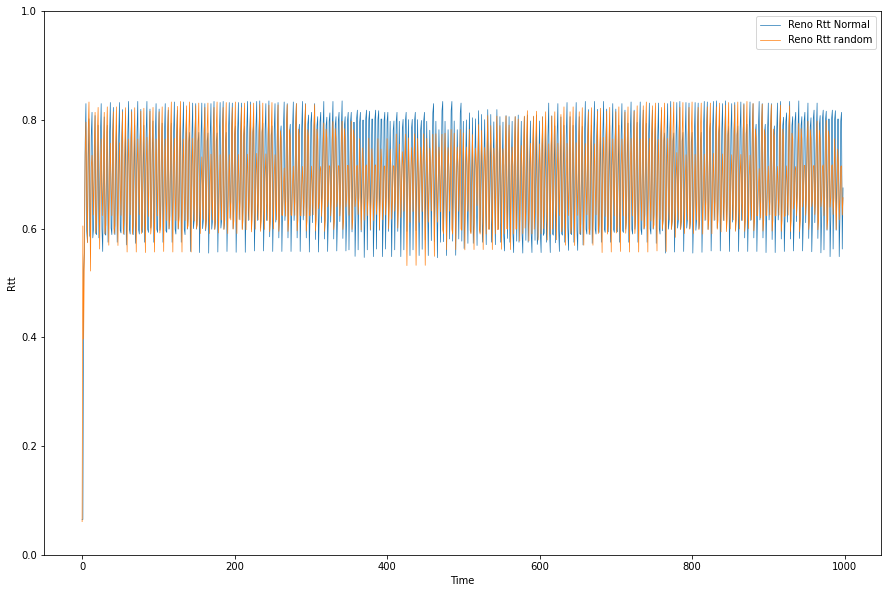

In [11]:
showDiagram(renoRtts1, renoRtts2, "Reno Rtt Normal", "Reno Rtt random", "Rtt", 0, 1)

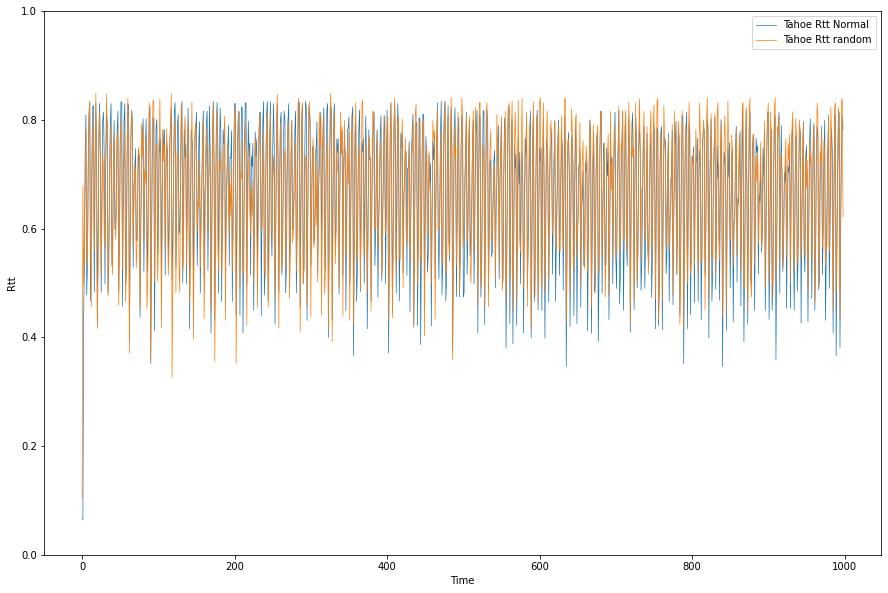

In [12]:
showDiagram(tahoeRtts1, tahoeRtts2, "Tahoe Rtt Normal", "Tahoe Rtt random", "Rtt", 0, 1)

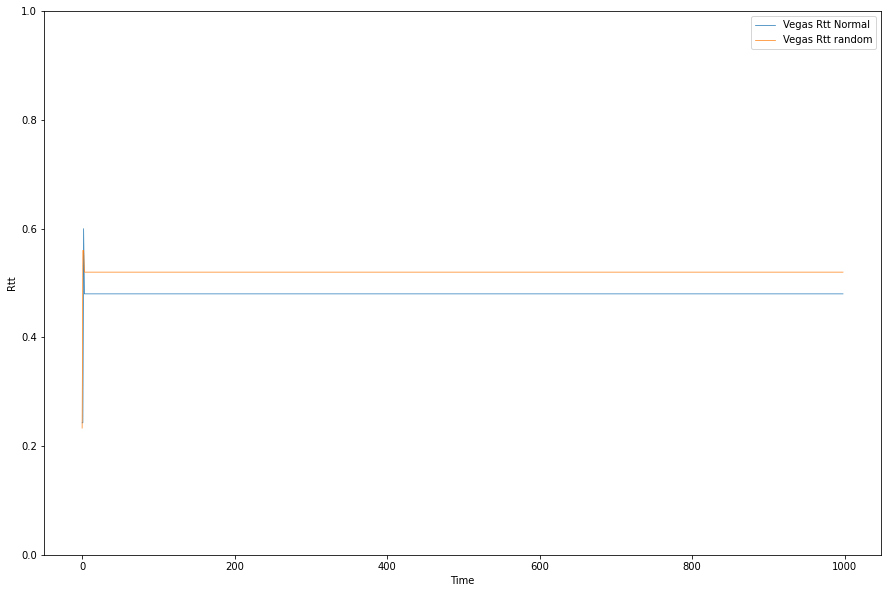

In [13]:
showDiagram(vegasRtts1, vegasRtts2, "Vegas Rtt Normal", "Vegas Rtt random", "Rtt", 0, 1)

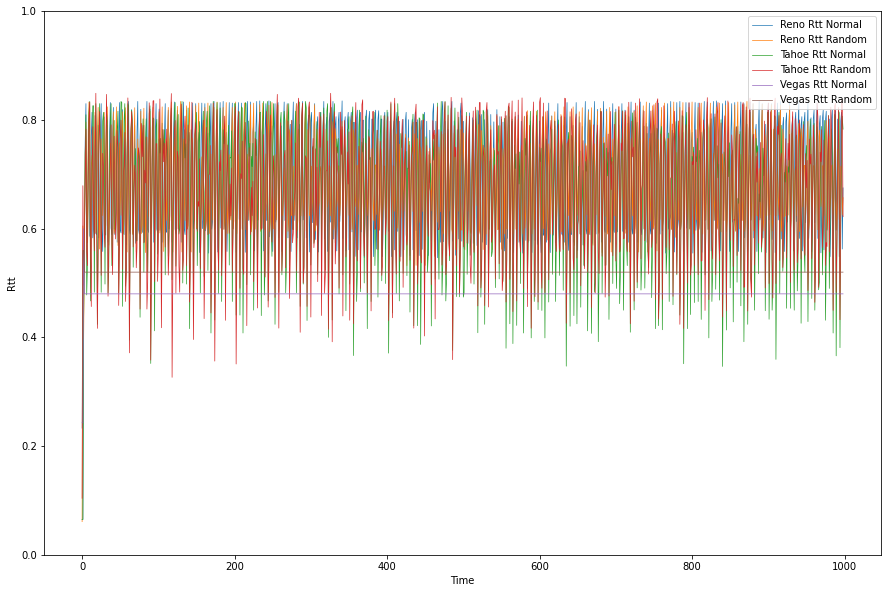

In [14]:
cwnds = [renoRtts1, renoRtts2, tahoeRtts1, tahoeRtts2, vegasRtts1, vegasRtts2]
labels = ["Reno Rtt Normal", "Reno Rtt Random", "Tahoe Rtt Normal", "Tahoe Rtt Random", "Vegas Rtt Normal", "Vegas Rtt Random",]
showAllDiagrams(cwnds, labels, "Rtt", 0, 1)

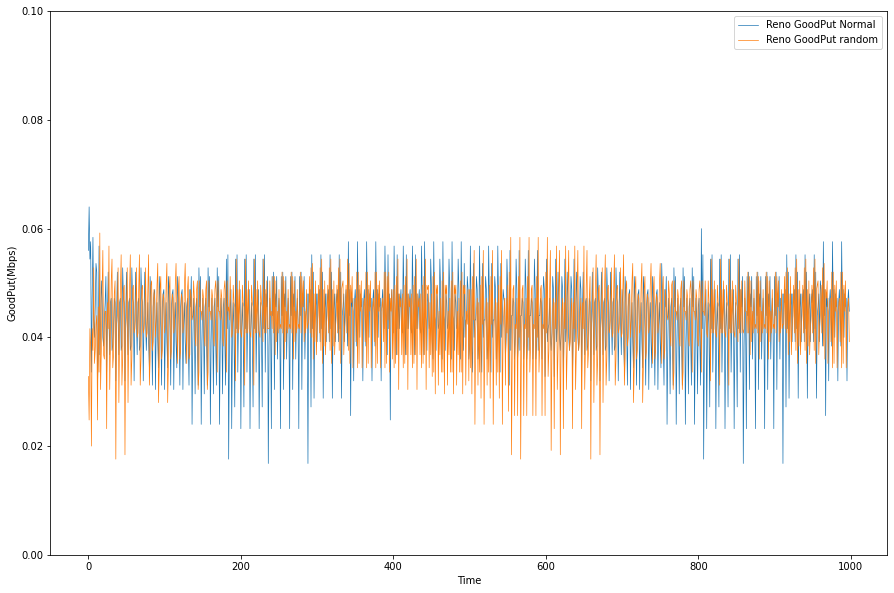

In [15]:
showDiagram(renoGoodPuts1, renoGoodPuts2, "Reno GoodPut Normal", "Reno GoodPut random", "GoodPut(Mbps)", 0, 0.1)

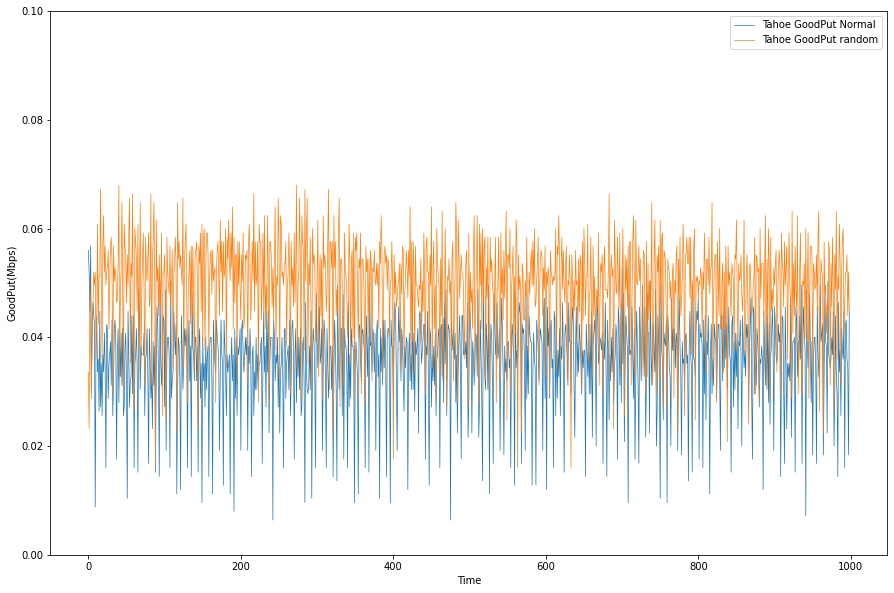

In [16]:
showDiagram(tahoeGoodPuts1, tahoeGoodPuts2, "Tahoe GoodPut Normal", "Tahoe GoodPut random", "GoodPut(Mbps)", 0, 0.1)

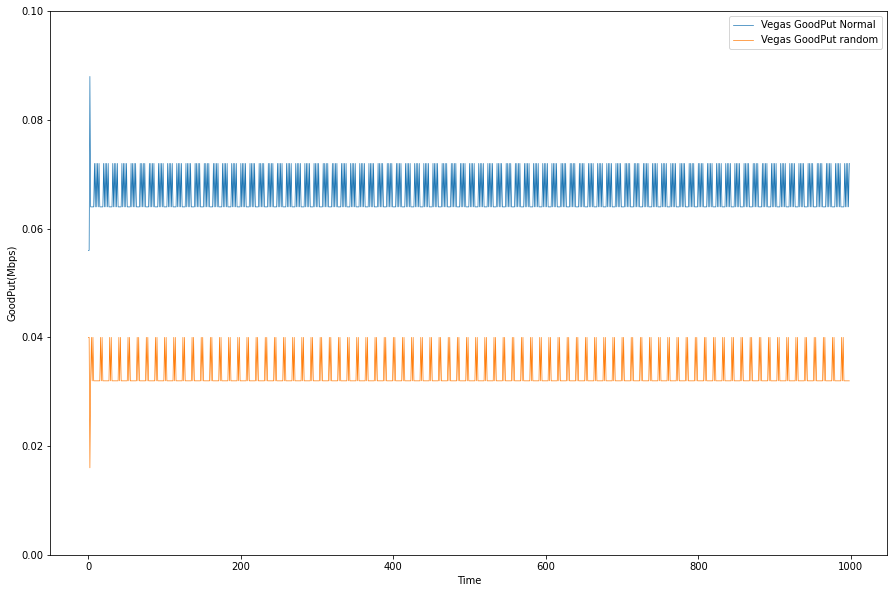

In [17]:
showDiagram(vegasGoodPuts1, vegasGoodPuts2, "Vegas GoodPut Normal", "Vegas GoodPut random", "GoodPut(Mbps)", 0, 0.1)

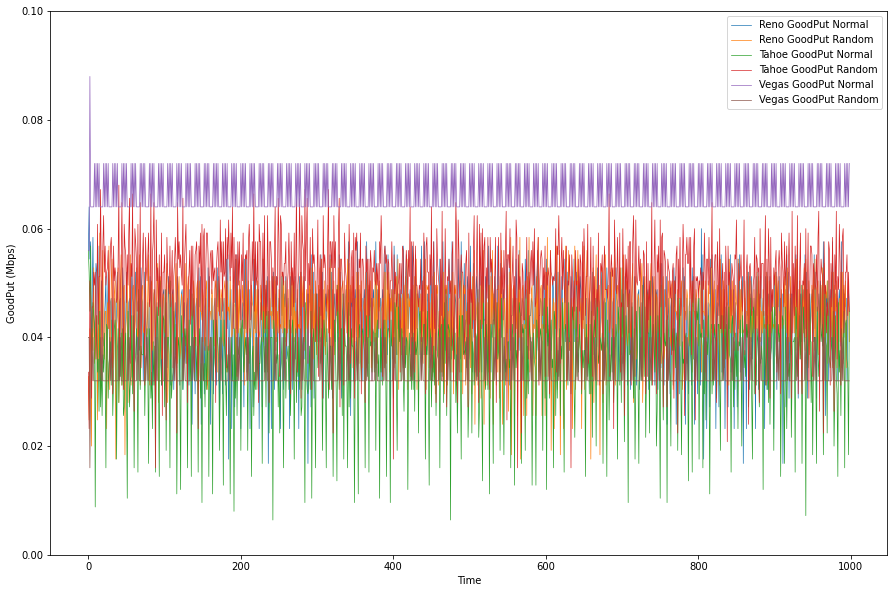

In [18]:
goodPuts = [renoGoodPuts1, renoGoodPuts2, tahoeGoodPuts1, tahoeGoodPuts2, vegasGoodPuts1, vegasGoodPuts2]
labels = ["Reno GoodPut Normal", "Reno GoodPut Random", "Tahoe GoodPut Normal", "Tahoe GoodPut Random", "Vegas GoodPut Normal", "Vegas GoodPut Random"]
showAllDiagrams(goodPuts, labels, "GoodPut (Mbps)", 0, 0.1)

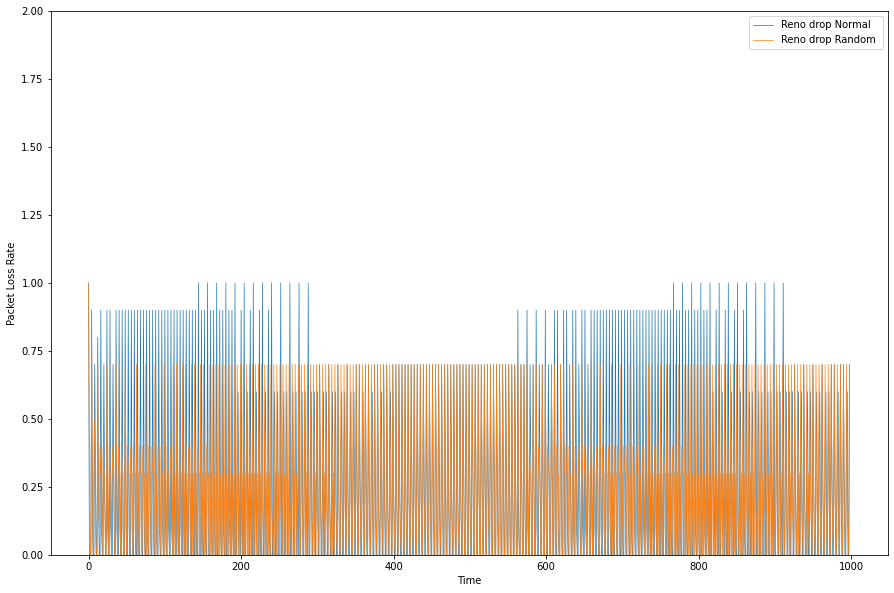

In [19]:
showDiagram(renoDrops1, renoDrops2, "Reno drop Normal", "Reno drop Random ", "Packet Loss Rate", 0, 2)

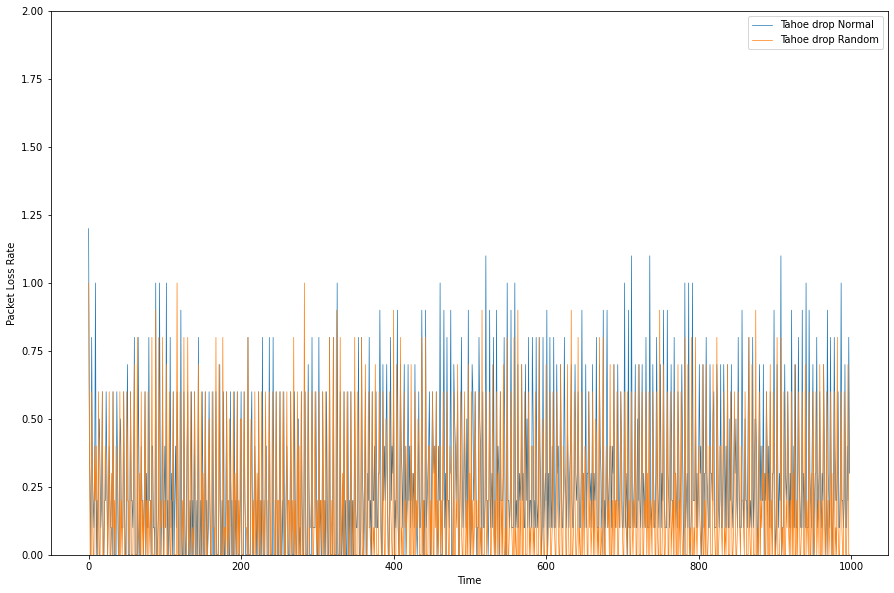

In [20]:
showDiagram(tahoeDrops1, tahoeDrops2, "Tahoe drop Normal", "Tahoe drop Random", "Packet Loss Rate", 0, 2)

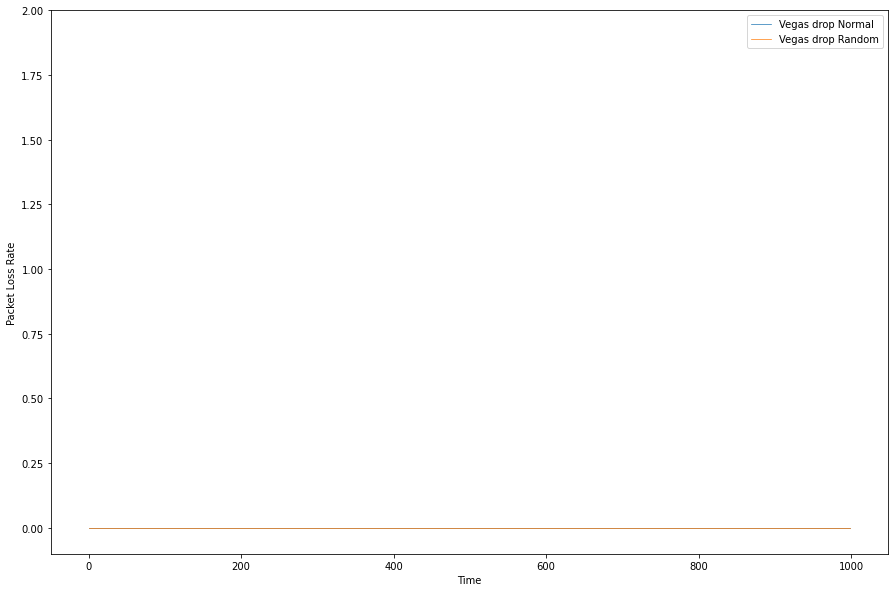

In [21]:
showDiagram(vegasDrops1, vegasDrops2, "Vegas drop Normal", "Vegas drop Random", "Packet Loss Rate", -0.1, 2)

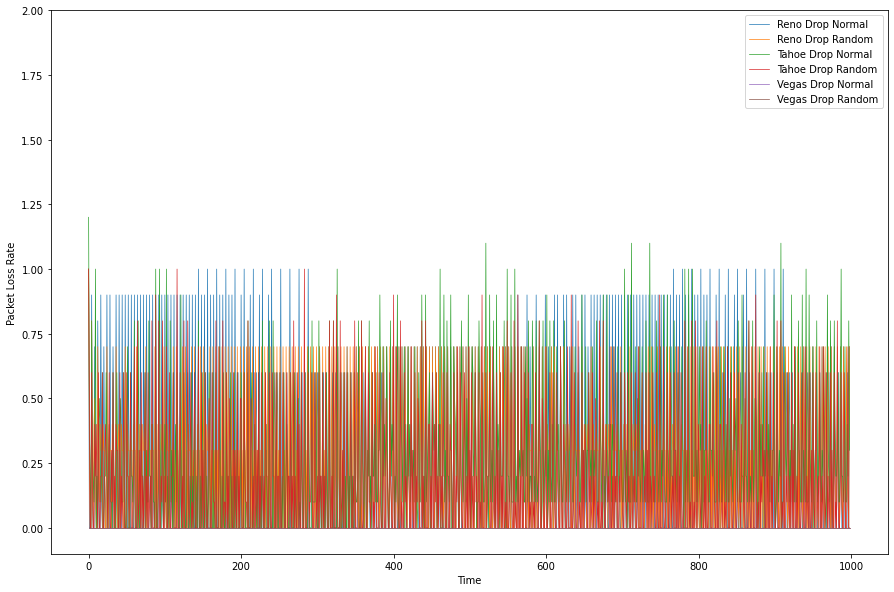

In [22]:
drops = [renoDrops1, renoDrops2, tahoeDrops1, tahoeDrops2, vegasDrops1, vegasDrops2]
labels = ["Reno Drop Normal", "Reno Drop Random", "Tahoe Drop Normal", "Tahoe Drop Random", "Vegas Drop Normal", "Vegas Drop Random"]
showAllDiagrams(drops, labels, "Packet Loss Rate", -0.1, 2)